<a href="https://colab.research.google.com/github/sautrikc/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOUSE PRICE PREDICTION

# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# IMPORTING DATASET

In [ ]:
df=pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


# DATA EXPLORATION AND VALIDATION

In [ ]:
df.shape


(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [ ]:
#for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


From description we can infer that

Avg price of house sold in King County, USA is $540088.
Max price of house sold in King County, USA is $7700000.
Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms bedroom with one house is having 33 Bedrooms


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# from above we can see that the data have no missing values


In [ ]:
import seaborn as sns

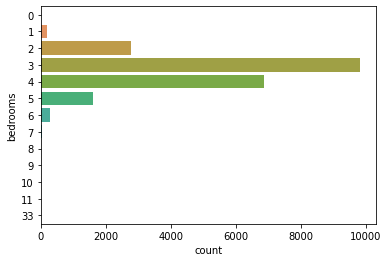

In [ ]:
sns.countplot(y="bedrooms",  data=df)

In [ ]:
print(df['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


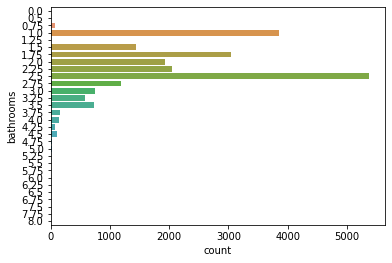

In [ ]:
sns.countplot(y="bathrooms",  data=df)

In [ ]:
print(df['bathrooms'].value_counts())

2.500    5380
1.000    3852
1.750    3048
2.250    2047
2.000    1930
1.500    1446
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      72
4.750      23
5.000      21
5.250      13
0.000      10
5.500      10
1.250       9
6.000       6
0.500       4
5.750       4
6.750       2
8.000       2
6.250       2
6.500       2
7.500       1
7.750       1
Name: bathrooms, dtype: int64


In [ ]:
print(df['view'].value_counts()) #we can see that view varies from 0-4

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [ ]:
print(df['grade'].value_counts())# we can see grade varies from 1-13

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


In [ ]:
print(df['condition'].value_counts()) # we can see that the condition varies from 1-5

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


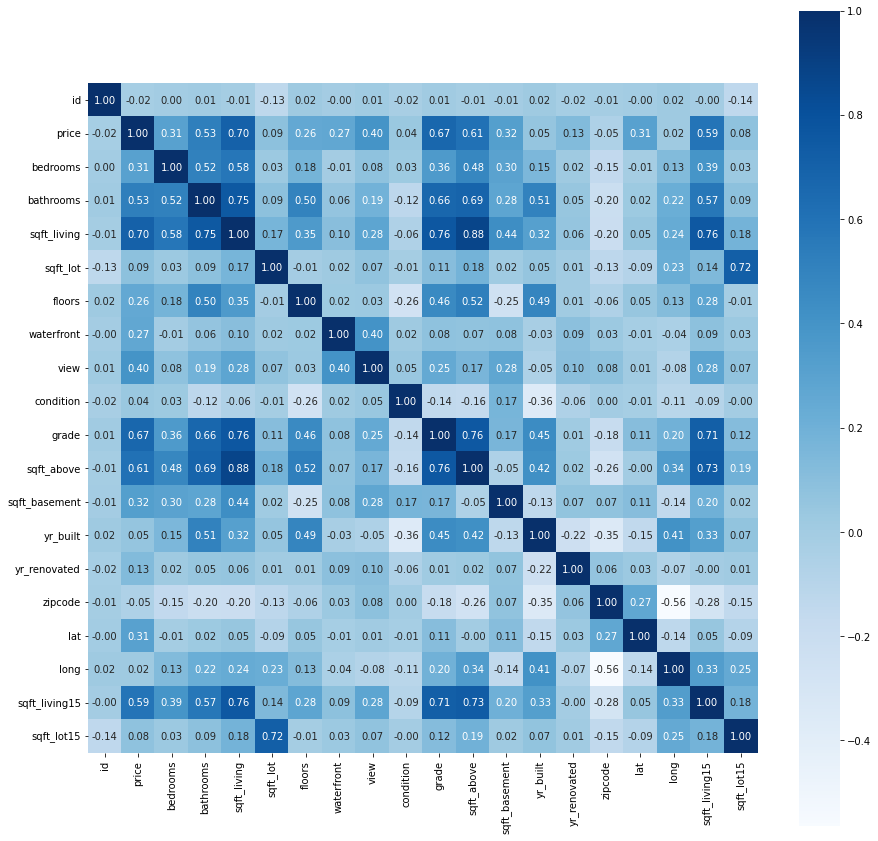

In [ ]:
# Let us plot the hatmap to check the correlation between different variable.
cor = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,cbar=True,square=True,fmt='.2f',annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
df.corr()["price"].sort_values(ascending=False)

price            1.000
sqft_living      0.702
grade            0.667
sqft_above       0.606
sqft_living15    0.585
bathrooms        0.525
view             0.397
sqft_basement    0.324
bedrooms         0.308
lat              0.307
waterfront       0.266
floors           0.257
yr_renovated     0.126
sqft_lot         0.090
sqft_lot15       0.082
yr_built         0.054
condition        0.036
long             0.022
id              -0.017
zipcode         -0.053
Name: price, dtype: float64

# DATA CLEANING 

In [ ]:
df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [ ]:
pred_cols=df.columns.values[3:]
print(pred_cols)

['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15']


In [ ]:
X = df[pred_cols]
y = df['price']
from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,train_size=0.8, random_state=55)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(17290, 18)
(17290,)
(4323, 18)
(4323,)


# Model Building

In [ ]:
from  sklearn.linear_model import LinearRegression #using Linear Regression model 
model1 = LinearRegression()
fitted=model1.fit(X_train, y_train)


# R squared and MAPE value

In [ ]:
#Rsquared value on train and test data
from sklearn import metrics
y_pred_train=model1.predict(X_train)
print("Train RSquared", metrics.r2_score(y_train,y_pred_train))

y_pred_test=model1.predict(X_test)
print("Test RSquared",metrics.r2_score(y_test,y_pred_test))

import numpy as np
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))


Train RSquared 0.7000374884775683
Test RSquared 0.6980338942510464
MAPE on Train data :  0.26
MAPE on Test data :  0.25


# IMPROVING THE R squared value

In [ ]:
import statsmodels.formula.api as sm
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
model = sm.ols(formula='price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+ waterfront+sqft_above+view+condition+grade+lat+long+sqft_living15 +sqft_lot15+sqft_basement', data=df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2990.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:07:54   Log-Likelihood:            -2.9546e+05
No. Observations:               21613   AIC:                         5.909e+05
Df Residuals:                   21597   BIC:                         5.911e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.284e+07   1.47e+06    -42.861

# Caluclating the VIF 

In [ ]:
#Code for VIF Calculation
#Writing a function to calculate the VIF values

def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
        

In [ ]:
X_Data=df.drop(["id","price","date"],axis=1)
vif_cal(input_data=X_Data)

bedrooms  VIF =  1.65
bathrooms  VIF =  3.35
sqft_living  VIF =  inf
sqft_lot  VIF =  2.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


floors  VIF =  2.01
waterfront  VIF =  1.2
view  VIF =  1.44
condition  VIF =  1.25
grade  VIF =  3.42
sqft_above  VIF =  inf
sqft_basement  VIF =  inf
yr_built  VIF =  2.43
yr_renovated  VIF =  1.15
zipcode  VIF =  1.66
lat  VIF =  1.18
long  VIF =  1.83
sqft_living15  VIF =  2.98
sqft_lot15  VIF =  2.14


In [ ]:
vif_cal(input_data=X_Data.drop(["grade"], axis=1))

bedrooms  VIF =  1.62
bathrooms  VIF =  3.33
sqft_living  VIF =  inf
sqft_lot  VIF =  2.1
floors  VIF =  2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


waterfront  VIF =  1.2
view  VIF =  1.43
condition  VIF =  1.25
sqft_above  VIF =  inf
sqft_basement  VIF =  inf
yr_built  VIF =  2.31
yr_renovated  VIF =  1.15
zipcode  VIF =  1.66
lat  VIF =  1.15
long  VIF =  1.78
sqft_living15  VIF =  2.74
sqft_lot15  VIF =  2.13


In [ ]:
vif_cal(input_data=X_Data.drop(["grade","bathrooms"], axis=1))

bedrooms  VIF =  1.57
sqft_living  VIF =  inf
sqft_lot  VIF =  2.1
floors  VIF =  1.85
waterfront  VIF =  1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


view  VIF =  1.42
condition  VIF =  1.24
sqft_above  VIF =  inf
sqft_basement  VIF =  inf
yr_built  VIF =  2.02
yr_renovated  VIF =  1.13
zipcode  VIF =  1.66
lat  VIF =  1.15
long  VIF =  1.78
sqft_living15  VIF =  2.74
sqft_lot15  VIF =  2.13


In [ ]:
vif_cal(input_data=X_Data.drop(["grade","bathrooms","sqft_living15"], axis=1))

bedrooms  VIF =  1.56
sqft_living  VIF =  inf
sqft_lot  VIF =  2.09
floors  VIF =  1.84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


waterfront  VIF =  1.2
view  VIF =  1.37
condition  VIF =  1.24
sqft_above  VIF =  inf
sqft_basement  VIF =  inf
yr_built  VIF =  2.02
yr_renovated  VIF =  1.13
zipcode  VIF =  1.64
lat  VIF =  1.14
long  VIF =  1.76
sqft_lot15  VIF =  2.13


In [ ]:
model = sm.ols(formula='price ~ id+bedrooms+sqft_living+sqft_lot+floors+ waterfront+sqft_above+view+condition+lat+long +sqft_lot15+sqft_basement', data=df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3321.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:07:57   Log-Likelihood:            -2.9630e+05
No. Observations:               21613   AIC:                         5.926e+05
Df Residuals:                   21600   BIC:                         5.927e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.293e+07   1.48e+06    -42.501

In [ ]:
# from above we can see that the VIF values are not very high and by dropping the feautures the R squared values goes on dropping 

#Feature Engineering

Handling the date variables

In [ ]:
date_vars = ['date', 'yr_built', 'yr_renovated']
house_price_dates=df[date_vars]
house_price_dates.head()

,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0


In [ ]:
house_price_dates['sale_year'] = np.int64([d[0:4] for d in house_price_dates["date"]])
house_price_dates['sale_month'] = np.int64([d[4:6] for d in house_price_dates["date"]])
house_price_dates['day_sold'] = np.int64([d[6:8] for d in house_price_dates["date"]])
house_price_dates['age_of_house'] = house_price_dates['sale_year'] - house_price_dates['yr_built']
house_price_dates['Ind_renovated'] = house_price_dates['yr_renovated']>0
house_price_dates.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,yr_built,yr_renovated,sale_year,sale_month,day_sold,age_of_house,Ind_renovated
0,20141013T000000,1955,0,2014,10,13,59,False
1,20141209T000000,1951,1991,2014,12,9,63,True
2,20150225T000000,1933,0,2015,2,25,82,False
3,20141209T000000,1965,0,2014,12,9,49,False
4,20150218T000000,1987,0,2015,2,18,28,False


In [ ]:
house_price_dates1=house_price_dates.drop(date_vars, axis=1) #keep only newly derived variables
house_price_data_dates=df.join(house_price_dates1)
house_price_data_dates.shape

(21613, 26)

# Model 1 with date columns

In [ ]:
col_names = house_price_data_dates.columns.values
#print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = house_price_data_dates[x_col_names]
y = house_price_data_dates['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'sale_year' 'sale_month' 'day_sold' 'age_of_house' 'Ind_renovated']
(17290, 23)
(17290,)
(4323, 23)
(4323,)


In [ ]:
import sklearn 
model2 = sklearn.linear_model.LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model2.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model2.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

Train data R-Squared :  0.7029901648104355
Test data R-Squared :  0.6990034789338941


In [ ]:
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))

MAPE on Train data :  0.25
MAPE on Test data :  0.25


# Model 2 with Geo locations 

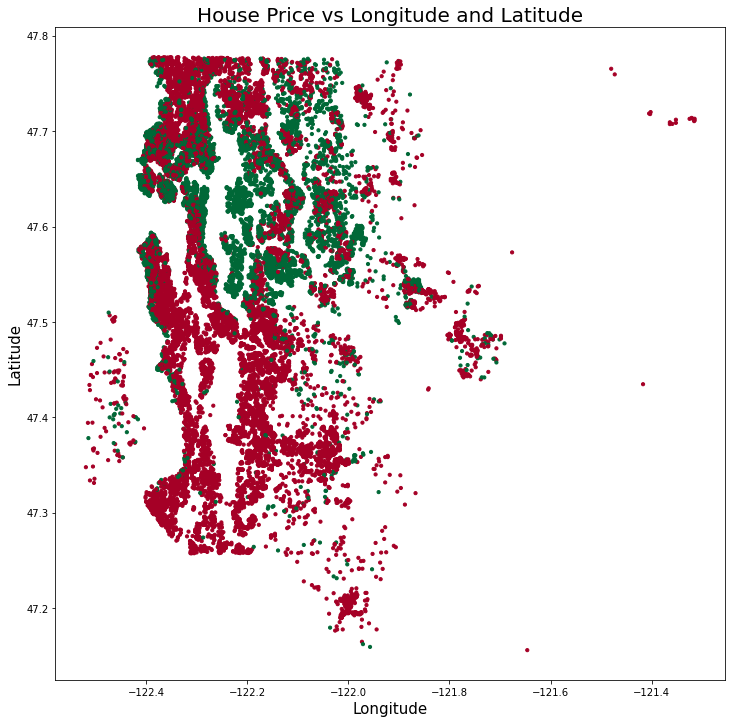

In [ ]:
###' House Price versus Longitude and Latitude'
bubble_col= df["price"] > df["price"].quantile(0.7)
# we are taking the top 30% houses with higher price
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(df["long"],df["lat"], c=bubble_col,cmap="RdYlGn",s=10)
plt.title('House Price vs Longitude and Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

# Plotting high house price center

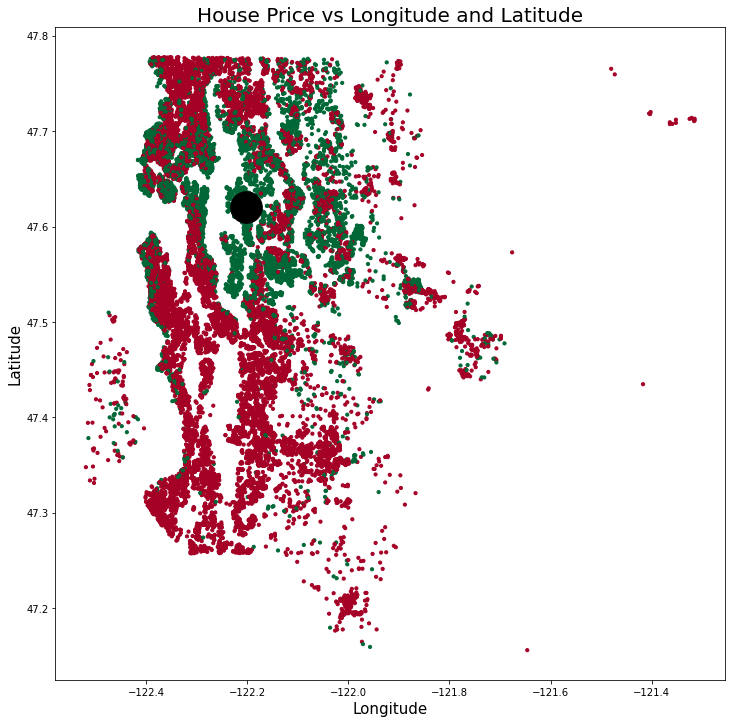

In [ ]:
high_long_mean=df["long"][bubble_col].mean()
high_lat_mean=df["lat"][bubble_col].mean()

plt.figure(figsize=(12,12))
plt.scatter(df["long"],df["lat"], c=bubble_col,cmap="RdYlGn",s=10)
plt.scatter(high_long_mean,high_lat_mean, c="black", s=1000)

plt.title('House Price vs Longitude and Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

# Distance of every house from the center

Text(0, 0.5, 'log(house price)')

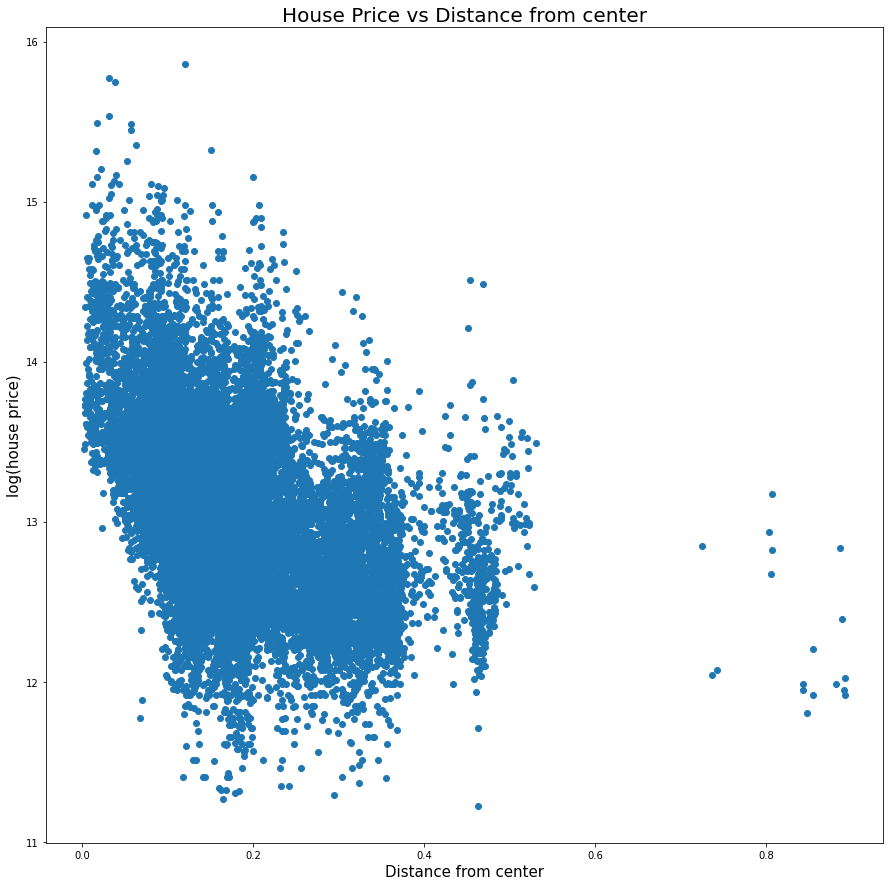

In [ ]:
##Distance from high priced houses center to every house
df["High_cen_distance"]=np.sqrt((df["long"] - high_long_mean) ** 2 + (df["lat"] - high_lat_mean) ** 2)

plt.figure(figsize=(15,15))
plt.scatter(df["High_cen_distance"],np.log(df["price"]))
plt.title('House Price vs Distance from center', fontsize=20)
plt.xlabel('Distance from center', fontsize=15)
plt.ylabel('log(house price)', fontsize=15)


In [ ]:
#Defining X data
col_names = df.columns.values
print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = df[x_col_names]
y = df['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn 
model3 = sklearn.linear_model.LinearRegression()
model3.fit(X_train, y_train)



['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'High_cen_distance']
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'High_cen_distance']
(17290, 19)
(17290,)
(4323, 19)
(4323,)


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model3.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model3.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))

Train data R-Squared :  0.714275933346028
Test data R-Squared :  0.71142420093584
MAPE on Train data :  0.26
MAPE on Test data :  0.25


# Model 3 with one hot encoding

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'High_cen_distance'],
      dtype='object')

In [ ]:
categorical_cols=['waterfront', 'view', 'condition', 'grade','zipcode']
for col in categorical_cols:
  print(df[col].value_counts())

0    21450
1      163
Name: waterfront, dtype: int64
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


In [ ]:
# get dummy variables
one_hot_data = pd.get_dummies(df['zipcode'])
#Try all ['view', 'condition', 'grade','zipcode']
print("one_hot_data \n", one_hot_data.sample(10))

one_hot_data 
        98001  98002  98003  98004  98005  98006  98007  98008  98010  98011  \
21369      0      0      0      0      0      0      0      0      0      0   
5946       0      0      0      0      0      0      0      0      0      0   
14465      0      0      0      0      0      0      0      0      0      0   
1610       0      0      0      0      0      0      0      0      0      0   
939        0      0      0      0      0      0      0      0      0      0   
20537      0      1      0      0      0      0      0      0      0      0   
13818      0      0      0      0      0      0      0      0      0      0   
11147      0      0      0      0      0      0      0      0      0      0   
6373       0      0      0      0      0      0      0      0      0      0   
22         0      0      0      0      0      0      0      0      0      0   

       ...  98146  98148  98155  98166  98168  98177  98178  98188  98198  \
21369  ...      0      0      0      0

In [ ]:
# Concatenate dummy columns with main dataframe
house_price_with_dummy = pd.concat([df, one_hot_data],axis=1)
house_price_with_dummy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
###Model building after Transformations
#Defining X data

prev_cols=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
encoded_cols=list(one_hot_data.columns.values)

all_pred_cols=prev_cols+encoded_cols

X = house_price_with_dummy[all_pred_cols]

y = house_price_with_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn 
model5 = sklearn.linear_model.LinearRegression()
model5.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model5.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model5.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))

Train data R-Squared :  0.8129693066896755
Test data R-Squared :  0.7883114077637524
MAPE on Train data :  0.1963
MAPE on Test data :  0.1947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


 # Model 4 with bins

Text(0.5, 0, 'sqft_living')

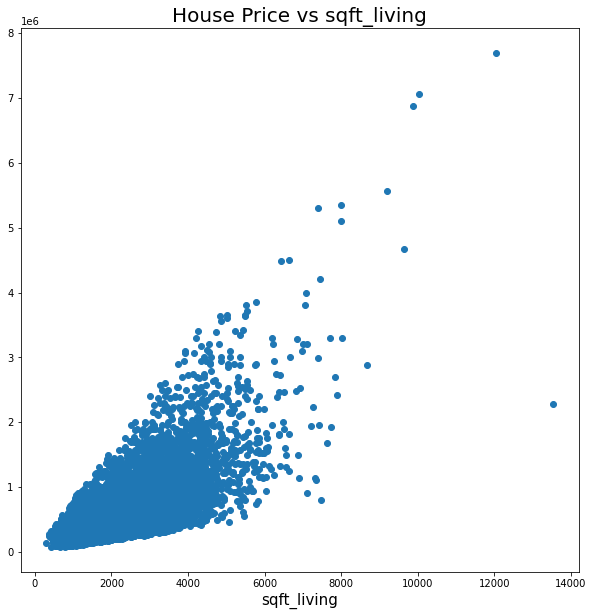

In [ ]:
plt.figure(figsize=(10,10))  # we are checking the variation of house price data with sqft_living
plt.scatter(df["sqft_living"],(df["price"]))
plt.title('House Price vs sqft_living', fontsize=20)
plt.xlabel('sqft_living', fontsize=15)

Text(0.5, 0, 'sqft_above')

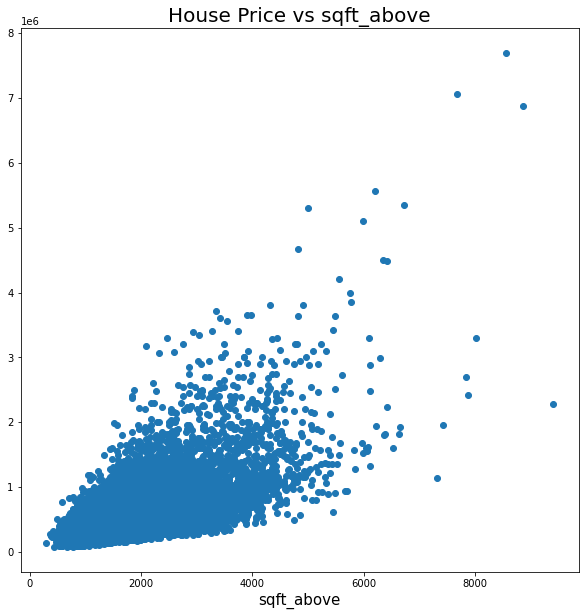

In [ ]:
plt.figure(figsize=(10,10)) # checking the variation of house price with sqft_above
plt.scatter(df["sqft_above"],(df["price"]))
plt.title('House Price vs sqft_above', fontsize=20)
plt.xlabel('sqft_above', fontsize=15)

Text(0.5, 0, 'sqft_basement')

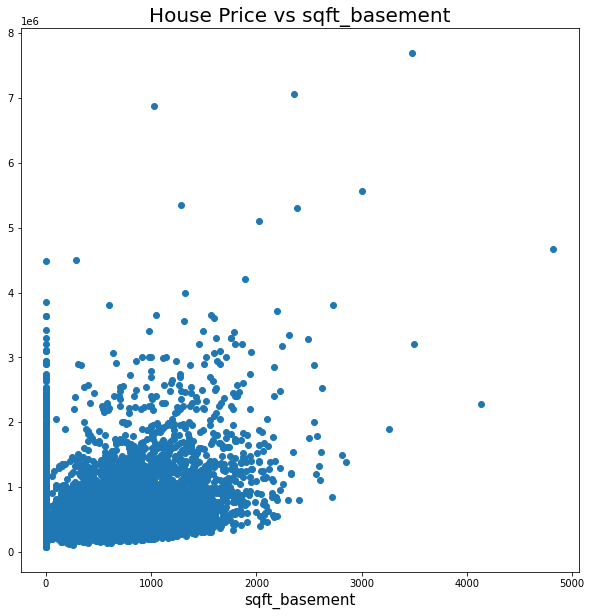

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df["sqft_basement"],(df["price"]))
plt.title('House Price vs sqft_basement', fontsize=20)
plt.xlabel('sqft_basement', fontsize=15)

Text(0.5, 0, 'sqft_lot')

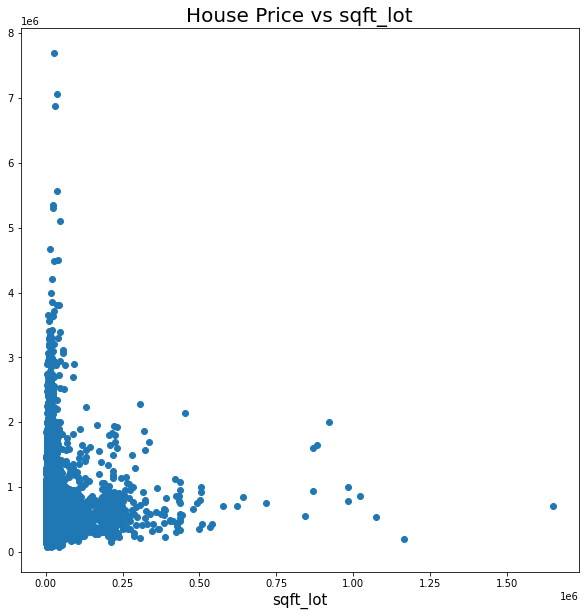

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df["sqft_lot"],(df["price"]))
plt.title('House Price vs sqft_lot', fontsize=20)
plt.xlabel('sqft_lot', fontsize=15)

Text(0.5, 0, 'sqft_lot15')

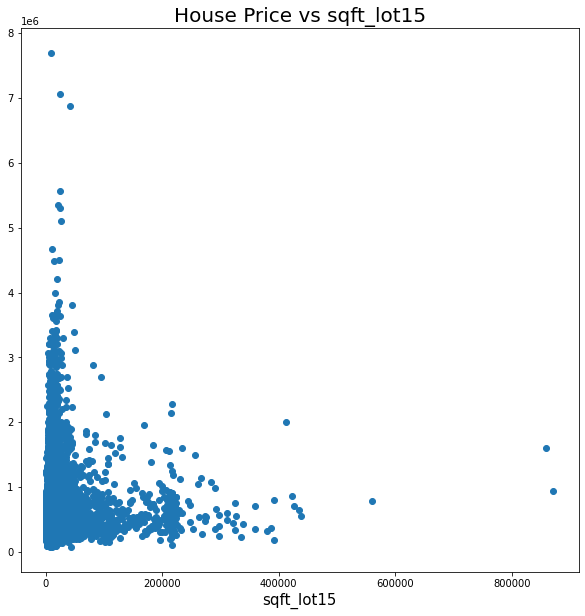

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df["sqft_lot15"],(df["price"]))
plt.title('House Price vs sqft_lot15', fontsize=20)
plt.xlabel('sqft_lot15', fontsize=15)

# Binning for sqft_living

In [ ]:
house_price_with_dummy['bins'] = pd.qcut(house_price_with_dummy["sqft_living"], q=10)
house_price_with_dummy['bins'].value_counts(sort=False)

(289.999, 1090.0]    2200
(1090.0, 1320.0]     2159
(1320.0, 1520.0]     2192
(1520.0, 1710.0]     2126
(1710.0, 1910.0]     2143
(1910.0, 2130.0]     2158
(2130.0, 2400.0]     2223
(2400.0, 2730.0]     2108
(2730.0, 3250.0]     2143
(3250.0, 13540.0]    2161
Name: bins, dtype: int64

In [ ]:
bins_one_hot = pd.get_dummies(house_price_with_dummy['bins'])
data_with_bins_dummy = pd.concat([house_price_with_dummy, bins_one_hot],axis=1)
bins_cols=list(bins_one_hot.columns)

all_pred_cols=prev_cols+encoded_cols+bins_cols

In [ ]:
X = data_with_bins_dummy[all_pred_cols]
y = data_with_bins_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn 
model6 = sklearn.linear_model.LinearRegression()
model6.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model6.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model6.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))

Train data R-Squared :  0.833100696527372
Test data R-Squared :  0.8075707167252404
MAPE on Train data :  0.1777
MAPE on Test data :  0.1793


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Biining for sqft_above

In [ ]:
data_with_bins_dummy['bins']=pd.qcut(data_with_bins_dummy["sqft_above"], q=10)# creating bins for sqft_above
data_with_bins_dummy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,"(289.999, 1090.0]","(1090.0, 1320.0]","(1320.0, 1520.0]","(1520.0, 1710.0]","(1710.0, 1910.0]","(1910.0, 2130.0]","(2130.0, 2400.0]","(2400.0, 2730.0]","(2730.0, 3250.0]","(3250.0, 13540.0]"
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_with_bins_dummy['bins'].value_counts(sort=False)

(289.999, 970.0]    2245
(970.0, 1120.0]     2126
(1120.0, 1260.0]    2224
(1260.0, 1400.0]    2165
(1400.0, 1560.0]    2090
(1560.0, 1760.0]    2126
(1760.0, 2040.0]    2182
(2040.0, 2410.0]    2142
(2410.0, 2950.0]    2167
(2950.0, 9410.0]    2146
Name: bins, dtype: int64

In [ ]:
bins_one_hot1 = pd.get_dummies(data_with_bins_dummy['bins'])
data_with_bins1_dummy = pd.concat([data_with_bins_dummy, bins_one_hot1],axis=1)
bins_cols1=list(bins_one_hot1.columns)

all_pred_cols1=prev_cols+encoded_cols+bins_cols+bins_cols1

In [ ]:
X = data_with_bins1_dummy[all_pred_cols1]
y = data_with_bins1_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn 
model6 = sklearn.linear_model.LinearRegression()
model6.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model6.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model6.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))


Train data R-Squared :  0.8342007297210832
Test data R-Squared :  0.8084982003073757
MAPE on Train data :  0.177
MAPE on Test data :  0.1787


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Binning for sqf_lot

In [ ]:
data_with_bins1_dummy['bins']=pd.qcut(data_with_bins1_dummy["sqft_lot"], q=10)# creating bins for sqft_above
data_with_bins1_dummy.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,"(289.999, 970.0]","(970.0, 1120.0]","(1120.0, 1260.0]","(1260.0, 1400.0]","(1400.0, 1560.0]","(1560.0, 1760.0]","(1760.0, 2040.0]","(2040.0, 2410.0]","(2410.0, 2950.0]","(2950.0, 9410.0]"
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_with_bins1_dummy['bins'].value_counts(sort=False)

(519.999, 3322.2]       2162
(3322.2, 4644.0]        2162
(4644.0, 5612.0]        2164
(5612.0, 6744.0]        2158
(6744.0, 7618.0]        2161
(7618.0, 8520.2]        2161
(8520.2, 9800.0]        2177
(9800.0, 12186.6]       2145
(12186.6, 21397.6]      2161
(21397.6, 1651359.0]    2162
Name: bins, dtype: int64

In [ ]:
bins_one_hot2 = pd.get_dummies(data_with_bins1_dummy['bins'])
data_with_bins2_dummy = pd.concat([data_with_bins1_dummy, bins_one_hot2],axis=1)
bins_cols2=list(bins_one_hot2.columns)

all_pred_cols2=prev_cols+encoded_cols+bins_cols+bins_cols1+bins_cols2

In [ ]:
X = data_with_bins2_dummy[all_pred_cols2]
y = data_with_bins2_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn 
model6 = sklearn.linear_model.LinearRegression()
model6.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model6.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model6.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Train data R-Squared :  0.8365034360505121
Test data R-Squared :  0.810971271618263
MAPE on Train data :  0.1753
MAPE on Test data :  0.176


# Biining for sqft_lot15

In [ ]:
data_with_bins2_dummy['bins']=pd.qcut(data_with_bins2_dummy["sqft_lot"], q=10)# creating bins for sqft_lot15
data_with_bins1_dummy['bins'].value_counts(sort=False)

(519.999, 3322.2]       2162
(3322.2, 4644.0]        2162
(4644.0, 5612.0]        2164
(5612.0, 6744.0]        2158
(6744.0, 7618.0]        2161
(7618.0, 8520.2]        2161
(8520.2, 9800.0]        2177
(9800.0, 12186.6]       2145
(12186.6, 21397.6]      2161
(21397.6, 1651359.0]    2162
Name: bins, dtype: int64

In [ ]:
bins_one_hot3 = pd.get_dummies(data_with_bins2_dummy['bins'])
data_with_bins3_dummy = pd.concat([data_with_bins2_dummy, bins_one_hot3],axis=1)
bins_cols3=list(bins_one_hot3.columns)

all_pred_cols3=prev_cols+encoded_cols+bins_cols+bins_cols1+bins_cols2+bins_cols3

In [ ]:
X = data_with_bins3_dummy[all_pred_cols3]
y = data_with_bins3_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn 
model6 = sklearn.linear_model.LinearRegression()
model6.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model6.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model6.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))

Train data R-Squared :  0.8365033658126806
Test data R-Squared :  0.810969196643023
MAPE on Train data :  0.1753
MAPE on Test data :  0.176


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


#Binning for sqft_basement

In [ ]:
data_with_bins3_dummy['bins']=pd.qcut(data_with_bins3_dummy["sqft_lot"], q=2)# creating bins for sqft_lot15
data_with_bins3_dummy['bins'].value_counts(sort=False)

(519.999, 7618.0]      10807
(7618.0, 1651359.0]    10806
Name: bins, dtype: int64

In [ ]:
bins_one_hot4 = pd.get_dummies(data_with_bins3_dummy['bins'])
data_with_bins4_dummy = pd.concat([data_with_bins3_dummy, bins_one_hot4],axis=1)
bins_cols4=list(bins_one_hot4.columns)

all_pred_cols4=prev_cols+encoded_cols+bins_cols+bins_cols1+bins_cols2+bins_cols3+bins_cols4

In [ ]:
X = data_with_bins4_dummy[all_pred_cols4]
y = data_with_bins4_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn 
model6 = sklearn.linear_model.LinearRegression()
model6.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model6.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model6.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))

Train data R-Squared :  0.8365033724999894
Test data R-Squared :  0.8109661384092793
MAPE on Train data :  0.1752
MAPE on Test data :  0.176


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
